<a href="https://colab.research.google.com/github/molabokchi/bokchi_open_lab/blob/main/deepdriver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 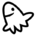 deepdriver quickstart!

welecome to deepdriver! 😀

You can refer to the guide document.
https://bokchi.gitbook.io/deepdriver-ce/

# 0. 💻 install deepdriver

In [55]:
pip install deepdriver==0.0.47

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#1. ➕ import deepdriver



In [56]:
import deepdriver

#2. ⚙ deepdriver server setting

In [58]:
deepdriver.setting(http_host="quick-experience.bokchi.com:9011" ,grpc_host="quick-experience.bokchi.com:19051")

#3. 🔌 log in to deepdriver

In [61]:
deepdriver.login(key="OTBlY2E1MGI5ZDhkOTkzZTRlOTEzY2IxYWVmOWU2NjZiNzc4ZmU0ZDE0YTQ5N2ZlY2UyMjVjZWM4ZGU2ZGQyNw==")

True

#4. 🥼 create experiment and run

In [62]:
epoch =10

In [63]:
def make_exp_name():
  import socket
  from datetime import datetime
  host_name = socket.gethostname()
  date = datetime.today().strftime("%Y%m%d") 

  return "exp" + "_" +host_name +"_"+date

In [64]:
# experiment init & config hyperparam
deepdriver.init(exp_name= make_exp_name(), 
                config={ 'epoch': epoch, 'batch_size': 32, 'hidden_layer':128, 'learning_rate':0.01})

2022-12-08 10:02:16,203 INFO [deepdriver] [experiment.py:21] - DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_f2274b10a66b_20221208
Run Name=mustache-maize-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_f2274b10a66b_20221208/mustache-maize-1/run/chart


INFO:deepdriver:DeepDriver initialized
Team Name=molamola.babo
Exp Name=exp_f2274b10a66b_20221208
Run Name=mustache-maize-1
Run URL=http://quick-experience.bokchi.com:9111/experi/molamola.babo/exp_f2274b10a66b_20221208/mustache-maize-1/run/chart


#5. 📚 train your code and send log

In [65]:
import random
accuracy = [ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
train_loss = [ random.uniform(0.1,  0.2-0.01*i)  for i in range(epoch)]
val_accuracy =[ random.uniform(0.7+0.02*i, 1)  for i in range(epoch)]
val_loss = [ random.uniform(0.2,  0.3-0.01*i)  for i in range(epoch)]

In [66]:
for i in range(epoch):
    # send train log
    deepdriver.log({'acc': accuracy[i], 'loss': train_loss[i], 'val_acc': val_accuracy[i],'val_loss': val_loss[i]})

#6. ⬆ upload artifact(data)

In [67]:
arti = deepdriver.Artifacts(name="sample",type="dataset")

In [68]:
arti.add("/content/sample_data")

In [69]:
[ent.path for ent  in arti.entry_list]

['anscombe.json',
 'README.md',
 'image/cat.png',
 'image/dog.png',
 'mnist_test.csv',
 'california_housing_test.csv',
 'mnist_train_small.csv',
 'california_housing_train.csv']

In [70]:
deepdriver.upload_artifact(arti)

Uploading: [./sample_data/california_housing_train.csv] |██████████████████████████████| [100.0%] [8/8]

True

#7. ⬇ download artifact(data)

In [71]:
arti2 = deepdriver.get_artifact(name="sample",type="dataset")

2022-12-08 10:02:45,141 INFO [deepdriver] [run.py:38] - artifact is got! 
 artifact id :{1}


INFO:deepdriver:artifact is got! 
 artifact id :{1}


In [72]:
arti2.download()

Downloading: [./deepdriver/artifact/1/mnist_train_small.csv] |██████████████████████████████| [100.0%] [8/8]

'./deepdriver/artifact/1'

#8. 📊 visualize train result

In [73]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [74]:
line =deepdriver.line(df,"step","acc")

In [75]:
deepdriver.visualize(line)

In [76]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])

In [77]:
line =deepdriver.line(df,"step","loss")

In [78]:
deepdriver.visualize(line)

In [79]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])

In [80]:
historgram = deepdriver.histogram(df,"step","acc")

In [81]:
deepdriver.visualize(historgram)

In [82]:
scatter = deepdriver.scatter(df,"step","acc")

In [83]:
deepdriver.visualize(scatter)

#9. 📈 send log for chart & table

In [84]:
df =deepdriver.DataFrame(columns=["step","loss"], data=[ [idx, loss] for idx, loss in enumerate(train_loss)])
line =deepdriver.line(df,"step","loss")
deepdriver.log({"my_line_chart":line})

Uploading: [./deepdriver/run/1/chart/my_line_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [85]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
historgram = deepdriver.histogram(df,"step","acc")
deepdriver.log({"my_histogram_chart":historgram})

Uploading: [./deepdriver/run/1/chart/my_histogram_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

In [86]:
df =deepdriver.DataFrame(columns=["step","acc"], data=[ [idx, acc] for idx, acc in enumerate(accuracy)])
scatter = deepdriver.scatter(df,"step","acc")
deepdriver.log({"my_scatter_chart":scatter})

Uploading: [./deepdriver/run/1/chart/my_scatter_chart.CHART.json] |██████████████████████████████| [100.0%] [1/1]

True

#10. 🔚 finish run

In [87]:
# finish experiment
deepdriver.finish()

True